In [5]:
import csv 
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
data = requests.get('https://covidtracking.com/api/v1/states/daily.json')
for item in json.loads(data.text): 
    if item['state'] == 'NY':
        print(item)
print(json.loads(data.text)[0])

{'date': 20200410, 'state': 'NY', 'positive': 170512, 'negative': 247373, 'pending': None, 'hospitalizedCurrently': 18569, 'hospitalizedCumulative': 33159, 'inIcuCurrently': 4908, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': 14590, 'hash': '19bf630f772c33bb63625ea2ee2befe0f8b671c1', 'dateChecked': '2020-04-10T20:00:00Z', 'death': 7844, 'hospitalized': 33159, 'total': 417885, 'totalTestResults': 417885, 'posNeg': 417885, 'fips': '36', 'deathIncrease': 777, 'hospitalizedIncrease': 290, 'negativeIncrease': 15761, 'positiveIncrease': 10575, 'totalTestResultsIncrease': 26336}
{'date': 20200409, 'state': 'NY', 'positive': 159937, 'negative': 231612, 'pending': None, 'hospitalizedCurrently': 18279, 'hospitalizedCumulative': 32869, 'inIcuCurrently': 4925, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': 14590, 'hash': '19512dcbae953900d3ef3e2afae921b0c28059d6', 'dateChecked': '2020-04-09

In [14]:
json_df = pd.DataFrame.from_records(json.loads(data.text))
json_df = json_df[['date', 'state', 'positive', 'negative', 'death', 'positiveIncrease', 'negativeIncrease']]

print(json_df.head())


       date state  positive  negative  death  positiveIncrease  \
0  20200410    AK     246.0    7186.0    7.0              11.0   
1  20200410    AL    2968.0   18058.0   80.0             199.0   
2  20200410    AR    1171.0   15949.0   23.0              52.0   
3  20200410    AS       0.0      20.0    0.0               0.0   
4  20200410    AZ    3112.0   34622.0   97.0              94.0   

   negativeIncrease  
0             198.0  
1               0.0  
2            2117.0  
3               0.0  
4             462.0  


In [6]:
print(data.text)
data = json.loads(data.text)

[{"date":20200406,"state":"AK","positive":191,"negative":6692,"pending":null,"hospitalizedCurrently":null,"hospitalizedCumulative":23,"inIcuCurrently":null,"inIcuCumulative":null,"onVentilatorCurrently":null,"onVentilatorCumulative":null,"recovered":null,"hash":"4d91929ba83b31e1dda30ca4a3c7d5716d39bfd7","dateChecked":"2020-04-06T20:00:00Z","death":6,"hospitalized":23,"total":6883,"totalTestResults":6883,"posNeg":6883,"fips":"02","deathIncrease":0,"hospitalizedIncrease":3,"negativeIncrease":593,"positiveIncrease":6,"totalTestResultsIncrease":599},{"date":20200406,"state":"AL","positive":1968,"negative":12797,"pending":null,"hospitalizedCurrently":null,"hospitalizedCumulative":240,"inIcuCurrently":null,"inIcuCumulative":null,"onVentilatorCurrently":null,"onVentilatorCumulative":null,"recovered":null,"hash":"2efa35d0a2dc1dac3c6e12ced852169b719f14ea","dateChecked":"2020-04-06T20:00:00Z","death":50,"hospitalized":240,"total":14765,"totalTestResults":14765,"posNeg":14765,"fips":"01","deathIn

In [7]:
def parse_date(date):
    return str(int(date/10000)) + '-' + str(int((date%10000)/100)) + '-' + str(int(date%100))


with open('covid_information.csv','w') as csv_file: 
    writer = csv.writer(csv_file)
    writer.writerow(['date', 'state', 'positive', 'negative', 'death', 'positiveIncrease', 'negativeIncrease', 'score'])
    for item in data: 
        print(item)
        date = parse_date(item["date"]) if "date" in item else None
        death = item["death"] if "death" in item else None
        positive = item["positive"] if "positive" in item else None
        negative = item["negative"] if "negative" in item else None
        state = item["state"] if "state" in item else None
        positive_increase = item["positiveIncrease"] if "positiveIncrease" in item else None
        negative_increase = item["negativeIncrease"] if "negativeIncrease" in item else None
        score = item["score"] if "score" in item else None
        result = [date, state, positive, negative, death, positive_increase, negative_increase]
        writer.writerow(result)
    

{'date': 20200406, 'state': 'AK', 'positive': 191, 'negative': 6692, 'pending': None, 'hospitalizedCurrently': None, 'hospitalizedCumulative': 23, 'inIcuCurrently': None, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': None, 'hash': '4d91929ba83b31e1dda30ca4a3c7d5716d39bfd7', 'dateChecked': '2020-04-06T20:00:00Z', 'death': 6, 'hospitalized': 23, 'total': 6883, 'totalTestResults': 6883, 'posNeg': 6883, 'fips': '02', 'deathIncrease': 0, 'hospitalizedIncrease': 3, 'negativeIncrease': 593, 'positiveIncrease': 6, 'totalTestResultsIncrease': 599}
{'date': 20200406, 'state': 'AL', 'positive': 1968, 'negative': 12797, 'pending': None, 'hospitalizedCurrently': None, 'hospitalizedCumulative': 240, 'inIcuCurrently': None, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': None, 'hash': '2efa35d0a2dc1dac3c6e12ced852169b719f14ea', 'dateChecked': '2020-04-06T20:00:00Z', 'death': 50, 'hospitalized':

{'date': 20200309, 'state': 'UT', 'positive': 1, 'hash': 'fa208666968a4489a5cde79e40c08bdddece1361', 'dateChecked': '2020-03-09T20:00:00Z', 'total': 1, 'totalTestResults': 1, 'posNeg': 1, 'fips': '49', 'deathIncrease': 0, 'hospitalizedIncrease': 0, 'negativeIncrease': 0, 'positiveIncrease': 0, 'totalTestResultsIncrease': 0}
{'date': 20200309, 'state': 'VA', 'positive': 3, 'negative': 38, 'pending': 9, 'hash': 'de39b29dd1a1a173788fc7a0f22b44ccb7899f1c', 'dateChecked': '2020-03-09T20:00:00Z', 'total': 50, 'totalTestResults': 41, 'posNeg': 41, 'fips': '51', 'deathIncrease': 0, 'hospitalizedIncrease': 0, 'negativeIncrease': 2, 'positiveIncrease': 1, 'totalTestResultsIncrease': 3}
{'date': 20200309, 'state': 'VT', 'positive': 1, 'negative': 34, 'hash': '26c656cc1971e9a2bde7f9614ffe7ef51900c432', 'dateChecked': '2020-03-09T20:00:00Z', 'total': 35, 'totalTestResults': 35, 'posNeg': 35, 'fips': '50', 'deathIncrease': 0, 'hospitalizedIncrease': 0, 'negativeIncrease': 6, 'positiveIncrease': 0, '

In [8]:
import pandas as pd

In [9]:
dataframe = pd.read_csv('covid_information.csv')

In [10]:
print(dataframe.head)

<bound method NDFrame.head of           date state  positive  negative  death  positiveIncrease  \
0     2020-4-6    AK     191.0    6692.0    6.0               6.0   
1     2020-4-6    AL    1968.0   12797.0   50.0             172.0   
2     2020-4-6    AR     875.0   11970.0   16.0              45.0   
3     2020-4-6    AS       0.0      20.0    0.0               0.0   
4     2020-4-6    AZ    2456.0   30078.0   65.0             187.0   
...        ...   ...       ...       ...    ...               ...   
1760  2020-3-4    OR       3.0      29.0    NaN               NaN   
1761  2020-3-4    SC       0.0       5.0    NaN               NaN   
1762  2020-3-4    TX       1.0       NaN    NaN               NaN   
1763  2020-3-4    WA      39.0       NaN   10.0               NaN   
1764  2020-3-4    WI       1.0      19.0    NaN               NaN   

      negativeIncrease  score  
0                593.0    NaN  
1               1515.0    NaN  
2               1558.0    NaN  
3            

In [16]:
def get_information_about_state(dataframe, state_code='NY', death_lag='3'):
    state_df = dataframe.loc[dataframe['state'] == state_code]
    state_df['date']= pd.to_datetime(state_df['date'])
    state_df = state_df.drop_duplicates('negative')
    state_df['pt_ratio'] = state_df['positive']/(state_df['positive'] + state_df['negative'])
    state_df['positiveIncrease'] = state_df['positive'] - state_df['positive'].shift(-1)
    state_df['negativeIncrease'] = state_df['negative'] - state_df['negative'].shift(-1)
    
    state_df['pt_increase_ratio'] = state_df['positiveIncrease']/(state_df['positiveIncrease'] 
                                                                  + state_df['negativeIncrease'])
    state_df['death_lag'] = state_df['death'].shift(3)
    state_df['death_ratio_lag'] = state_df['death']/state_df['positiveIncrease']
    state_df = state_df.fillna(0)
    state_df = state_df[:-9]
    return state_df

/Users/rahulkataria/Documents/MLPROGRAMMING/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


         date  positive  negative   death  positiveIncrease  negativeIncrease  \
0  2020-03-04     100.0     510.0    10.0               NaN               NaN   
1  2020-03-05     147.0     538.0    11.0              47.0              28.0   
2  2020-03-06     180.0     924.0    14.0              33.0             386.0   
3  2020-03-07     260.0     924.0    16.0              80.0               0.0   
4  2020-03-08     308.0    1194.0    18.0              48.0             270.0   
5  2020-03-09     433.0    1892.0    22.0             125.0             698.0   
6  2020-03-10     560.0    1892.0    24.0             127.0               0.0   
7  2020-03-11     732.0    3183.0    24.0             172.0            1291.0   
8  2020-03-12     850.0    4045.0    33.0             118.0             862.0   
9  2020-03-13    1203.0    8137.0    35.0             353.0            4092.0   
10 2020-03-14    1482.0   10048.0    42.0             279.0            1911.0   
11 2020-03-15    1802.0   12

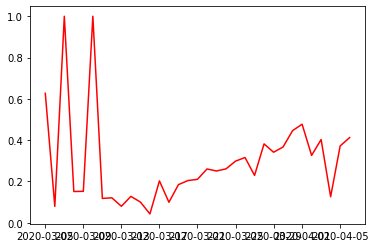

In [120]:
second_df = dataframe[dataframe['state'].isin(['CA', 'WA', 'MA', 'NY'])]
second_df['date']= pd.to_datetime(second_df['date'])
second_df = second_df.groupby(['date'], as_index=False)[['positive', 'negative', 'death']].agg('sum')
second_df['positiveIncrease'] = second_df['positive'] - second_df['positive'].shift(1)
second_df['negativeIncrease'] = second_df['negative'] - second_df['negative'].shift(1)
second_df['pt_increase_ratio'] = second_df['positiveIncrease']/(second_df['positiveIncrease'] 
                                                                  + second_df['negativeIncrease'])
second_df.head()
plt.plot(second_df['date'], second_df['pt_increase_ratio'], 'r')
print(second_df)

In [121]:
state_df = get_information_about_state(dataframe, state_code='CA')
print(state_df)

          date state  positive  negative  death  positiveIncrease  \
5   2020-04-06    CA   14336.0  103095.0  343.0            2310.0   
117 2020-04-04    CA   12026.0  101674.0  276.0            1325.0   
173 2020-04-03    CA   10701.0   24599.0  237.0            1510.0   
229 2020-04-02    CA    9191.0   23809.0  203.0            1036.0   
285 2020-04-01    CA    8155.0   21772.0  171.0            1708.0   
397 2020-03-30    CA    6447.0   20549.0  133.0            2568.0   
565 2020-03-27    CA    3879.0   17380.0   78.0            1524.0   
677 2020-03-25    CA    2355.0   15921.0   53.0             253.0   
733 2020-03-24    CA    2102.0   13452.0   40.0             369.0   

     negativeIncrease  score  pt_ratio  pt_increase_ratio  death_lag  \
5              1421.0    0.0  0.122080           0.619137        0.0   
117           77075.0    0.0  0.105770           0.016901        0.0   
173             790.0    0.0  0.303144           0.656522        0.0   
229            2037.0

/Users/rahulkataria/Documents/MLPROGRAMMING/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


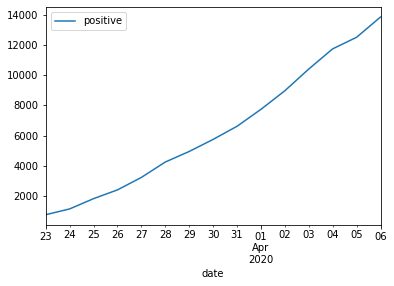

In [70]:
state_df.plot.line(x='date', y='positive')

In [18]:
mass_df = get_information_about_state(json_df, 'MA')
print(mass_df)

                              date state  positive  negative  death  \
21   1970-01-01 00:00:00.020200410    MA   20974.0   81398.0  599.0   
77   1970-01-01 00:00:00.020200409    MA   18941.0   76017.0  503.0   
133  1970-01-01 00:00:00.020200408    MA   16790.0   70721.0  433.0   
189  1970-01-01 00:00:00.020200407    MA   15202.0   66142.0  356.0   
245  1970-01-01 00:00:00.020200406    MA   13837.0   62592.0  260.0   
301  1970-01-01 00:00:00.020200405    MA   12500.0   59437.0  231.0   
357  1970-01-01 00:00:00.020200404    MA   11736.0   57064.0  216.0   
413  1970-01-01 00:00:00.020200403    MA   10402.0   52560.0  192.0   
469  1970-01-01 00:00:00.020200402    MA    8966.0   47642.0  154.0   
525  1970-01-01 00:00:00.020200401    MA    7738.0   44000.0  122.0   
581  1970-01-01 00:00:00.020200331    MA    6620.0   40315.0   89.0   
637  1970-01-01 00:00:00.020200330    MA    5752.0   37041.0   56.0   
693  1970-01-01 00:00:00.020200329    MA    4955.0   34111.0   48.0   
749  1

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


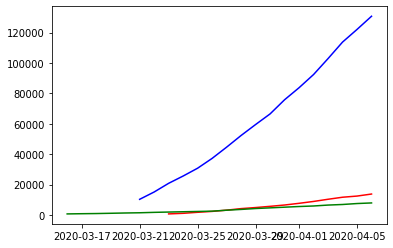

In [82]:
plt.plot(mass_df['date'], mass_df['positive'], 'r', nyc_df['date'], nyc_df['positive'], 'b', wash_df['date'], wash_df['positive'], 'g' )

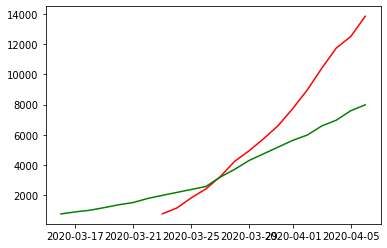

In [83]:
plt.plot(mass_df['date'], mass_df['positive'], 'r', wash_df['date'], wash_df['positive'], 'g' )

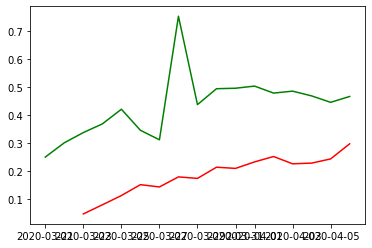

In [106]:
plt.plot(mass_df['date'], mass_df['pt_increase_ratio'], 'r', nyc_df['date'], nyc_df['pt_increase_ratio'], 'g')

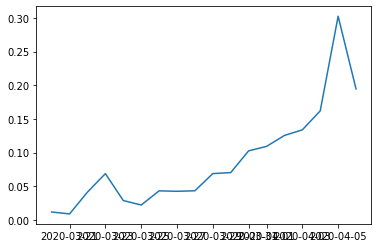

In [24]:
plt.plot(mass_df['date'], mass_df['death_ratio_lag'])

In [90]:
data = requests.get('https://covidtracking.com/api/us/daily.json')

In [91]:
data = json.loads(data.text)

In [92]:
print(data)

[{'date': 20200406, 'states': 56, 'positive': 361331, 'negative': 1555764, 'pending': 17292, 'hospitalizedCurrently': 27675, 'hospitalizedCumulative': 45168, 'inIcuCurrently': 6607, 'inIcuCumulative': 971, 'onVentilatorCurrently': 2932, 'onVentilatorCumulative': 187, 'recovered': 16006, 'hash': '206c757b1b311a9be1cd19c90c9782422a421a55', 'dateChecked': '2020-04-06T20:00:00Z', 'death': 10680, 'hospitalized': 45168, 'total': 1934387, 'totalTestResults': 1917095, 'posNeg': 1917095, 'deathIncrease': 1182, 'hospitalizedIncrease': 3796, 'negativeIncrease': 126040, 'positiveIncrease': 29023, 'totalTestResultsIncrease': 155063}, {'date': 20200405, 'states': 56, 'positive': 332308, 'negative': 1429724, 'pending': 17307, 'hospitalizedCurrently': 23061, 'hospitalizedCumulative': 41372, 'inIcuCurrently': 5497, 'inIcuCumulative': 913, 'onVentilatorCurrently': 612, 'onVentilatorCumulative': 193, 'recovered': 14486, 'hash': 'a5f1f58fe74620c89cde687c8beae82629c8b1e0', 'dateChecked': '2020-04-05T20:00:

In [96]:
with open('covid_us_information.csv','w') as csv_file: 
    writer = csv.writer(csv_file)
    writer.writerow(['date', 'positive', 'negative', 'death', 'positiveIncrease', 'negativeIncrease'])
    for item in data: 
        print(item)
        date = parse_date(item["date"]) if "date" in item else None
        death = item["death"] if "death" in item else None
        positive = item["positive"] if "positive" in item else None
        negative = item["negative"] if "negative" in item else None
        positive_increase = item["positiveIncrease"] if "positiveIncrease" in item else None
        negative_increase = item["negativeIncrease"] if "negativeIncrease" in item else None
        result = [date, positive, negative, death, positive_increase, negative_increase]
        writer.writerow(result)
        

{'date': 20200406, 'states': 56, 'positive': 361331, 'negative': 1555764, 'pending': 17292, 'hospitalizedCurrently': 27675, 'hospitalizedCumulative': 45168, 'inIcuCurrently': 6607, 'inIcuCumulative': 971, 'onVentilatorCurrently': 2932, 'onVentilatorCumulative': 187, 'recovered': 16006, 'hash': '206c757b1b311a9be1cd19c90c9782422a421a55', 'dateChecked': '2020-04-06T20:00:00Z', 'death': 10680, 'hospitalized': 45168, 'total': 1934387, 'totalTestResults': 1917095, 'posNeg': 1917095, 'deathIncrease': 1182, 'hospitalizedIncrease': 3796, 'negativeIncrease': 126040, 'positiveIncrease': 29023, 'totalTestResultsIncrease': 155063}
{'date': 20200405, 'states': 56, 'positive': 332308, 'negative': 1429724, 'pending': 17307, 'hospitalizedCurrently': 23061, 'hospitalizedCumulative': 41372, 'inIcuCurrently': 5497, 'inIcuCumulative': 913, 'onVentilatorCurrently': 612, 'onVentilatorCumulative': 193, 'recovered': 14486, 'hash': 'a5f1f58fe74620c89cde687c8beae82629c8b1e0', 'dateChecked': '2020-04-05T20:00:00

In [102]:
national_df = pd.read_csv('covid_us_information.csv')
national_df['pt_increase_ratio'] = national_df['positiveIncrease']/(national_df['positiveIncrease'] + national_df['negativeIncrease'])
national_df = national_df[:-9]

In [103]:
print(national_df)

         date  positive  negative  death  positiveIncrease  negativeIncrease  \
0    2020-4-6    361331   1555764  10680           29023.0          126040.0   
1    2020-4-5    332308   1429724   9498           26553.0          111672.0   
2    2020-4-4    305755   1318052   8314           33767.0          193178.0   
3    2020-4-3    271988   1124874   6962           32889.0           96225.0   
4    2020-4-2    239099   1028649   5784           28283.0           89459.0   
5    2020-4-1    210816    939190   4700           26133.0           74989.0   
6   2020-3-31    184683    864201   3746           24153.0           79877.0   
7   2020-3-30    160530    784324   2939           21469.0           92034.0   
8   2020-3-29    139061    692290   2428           20827.0           74820.0   
9   2020-3-28    118234    617470   1965           18821.0           90250.0   
10  2020-3-27     99413    527220   1530           18678.0           88617.0   
11  2020-3-26     80735    438603   1163

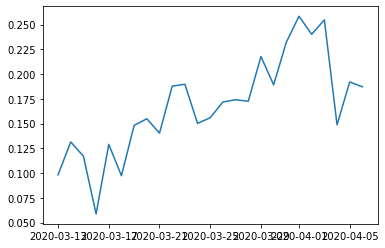

In [105]:
national_df['date']= pd.to_datetime(national_df['date'])


plt.plot(national_df['date'], national_df['pt_increase_ratio'])